In [5]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
from sklearn import cluster
from sklearn import datasets as dt
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import numpy as np
import seaborn as sns

/users/kent/stadiset/anaconda3/envs/cnn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


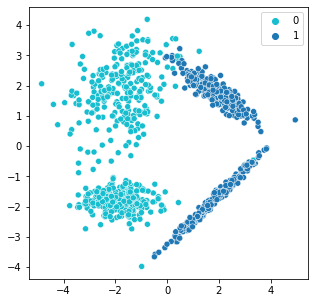

In [6]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')

fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
plt_ind_list = np.arange(3)+131

for class_sep,plt_ind in zip([1],plt_ind_list):
    X,y = dt.make_classification(n_samples=1000,
                                 n_features=2,
                                 n_repeated=0,
                                 class_sep=1.8,
                                 n_redundant=0,
                                 random_state=rand_state)
    palette = {0:"tab:cyan",
               1:"tab:blue", 
               }
    sns.scatterplot(X[:,0],X[:,1], hue = y, palette=palette )

plt.show()

In [7]:
# X1 = torch.randn(1000, 2)
# print(X1)
# X2 = torch.randn(1000, 2) + 1.5
# X = torch.cat([X1, X2], dim=0)
# print(X2)
# Y1 = torch.zeros(1000, 1)
# Y2 = torch.ones(1000, 1)
# Y = torch.cat([Y1, Y2], dim=0)
# print(Y)
# print(X1.size())
# print(Y.size())
# print(X.size(0))

In [8]:
# plt.scatter(X1[:, 0], X1[:, 1], color='b')
# plt.scatter(X2[:, 0], X2[:, 1], color='r')

In [9]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(2, 2)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(2, 2)
        self.out = nn.Linear(2, 1)
        self.out_act = nn.Sigmoid()
        
    def forward(self, input_):
        a1 = self.fc1(input_)
        h1 = self.relu(a1)
        a2 = self.fc2(h1)
        h2 = self.relu(a2)
        a3 = self.out(h2)
        y = self.out_act(a3)
        return y
    
net = Net()
opt = optim.Adam(net.parameters(), lr=0.1, betas=(0.9, 0.999))
criterion = nn.BCELoss()

# class Net(nn.Module):
    
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(2, 50)
#         self.relu1 = nn.ReLU()
#         self.dout = nn.Dropout(0.2)
#         self.fc2 = nn.Linear(50, 100)
#         self.prelu = nn.PReLU(1)
#         self.out = nn.Linear(100, 1)
#         self.out_act = nn.Sigmoid()
        
#     def forward(self, input_):
#         a1 = self.fc1(input_)
#         h1 = self.relu1(a1)
#         dout = self.dout(h1)
#         a2 = self.fc2(dout)
#         h2 = self.prelu(a2)
#         a3 = self.out(h2)
#         y = self.out_act(a3)
#         return y
    
# net = Net()
# opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
# criterion = nn.BCELoss()

In [10]:
# X,y = datasets.make_moons(n_samples=1500, shuffle=True, noise=0.2, random_state=1234)
# y = np.reshape(y, (len(y),1))

In [11]:
def train_epoch(model, opt, criterion, batch_size=50):
    model.train()
    losses = []
    for beg_i in range(0, X.size(0), batch_size):
        x_batch = X[beg_i:beg_i + batch_size, :]
        y_batch = Y[beg_i:beg_i + batch_size, :]
        x_batch = Variable(x_batch)
        y_batch = Variable(y_batch)

        opt.zero_grad()
        # (1) Forward
        y_hat = net(x_batch)
        
        # (2) Compute diff
        loss = criterion(y_hat, y_batch)
        # (3) Compute gradients
        loss.backward()
        # (4) update weights
        opt.step()        
        losses.append(loss.data.numpy())
    return losses

In [12]:
e_losses = []
num_epochs = 50
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion)
plt.plot(e_losses)

TypeError: 'int' object is not callable

In [8]:
x_t = Variable(torch.randn(1, 2))
net.eval()
print(net(x_t))
x_1_t = Variable(torch.randn(1, 2) + 1.5)
print(net(x_1_t))

tensor([[0.5828]], grad_fn=<SigmoidBackward0>)
tensor([[0.5828]], grad_fn=<SigmoidBackward0>)


In [9]:
print("=========================Layer Weights=======================")
print(net.fc1.weight)
print(net.fc2.weight)
print(net.out.weight)
print("=========================Layer Biases=======================")
print(net.fc1.bias)
print(net.fc2.bias)
print(net.out.bias)

=========================Layer Weights=======================
Parameter containing:
tensor([[ 2.1396,  1.6519],
        [-0.5321, -0.5725]], requires_grad=True)
Parameter containing:
tensor([[-1.9207, -1.1551],
        [-1.7261, -0.1869]], requires_grad=True)
Parameter containing:
tensor([[0.5410, 0.3034]], requires_grad=True)
=========================Layer Biases=======================
Parameter containing:
tensor([ 0.9999, -1.0745], requires_grad=True)
Parameter containing:
tensor([-0.5513, -1.1797], requires_grad=True)
Parameter containing:
tensor([0.3344], requires_grad=True)
